Roland D'Cruz (9250)

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"rolanddcruz01","key":"1e53f05c008205bb85c8b29f3be94343"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 675M/675M [00:23<00:00, 31.9MB/s]
100% 675M/675M [00:23<00:00, 29.9MB/s]


In [ ]:
!mkdir data
!unzip cell-images-for-detecting-malaria.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: data/cell_images/cell_images/Uninfected/C236ThinF_IMG_

image_stats: 

[{'Class': 'Parasitized', 'Num_Images': 13780, 'Mean_Height': 134.3868930981929, 'Mean_Width': 133.6318310472458, 'Min_Height': 40, 'Min_Width': 46, 'Max_Height': 385, 'Max_Width': 394}]
image_stats: 

[{'Class': 'Parasitized', 'Num_Images': 13780, 'Mean_Height': 134.3868930981929, 'Mean_Width': 133.6318310472458, 'Min_Height': 40, 'Min_Width': 46, 'Max_Height': 385, 'Max_Width': 394}, {'Class': 'Uninfected', 'Num_Images': 13780, 'Mean_Height': 131.58001306335728, 'Mean_Width': 131.3424776834313, 'Min_Height': 49, 'Min_Width': 49, 'Max_Height': 235, 'Max_Width': 247}]
         Class  Num_Images  Mean_Height  Mean_Width  Min_Height  Min_Width  \
0  Parasitized       13780   134.386893  133.631831          40         46   
1   Uninfected       13780   131.580013  131.342478          49         49   

   Max_Height  Max_Width  
0         385        394  
1         235        247  


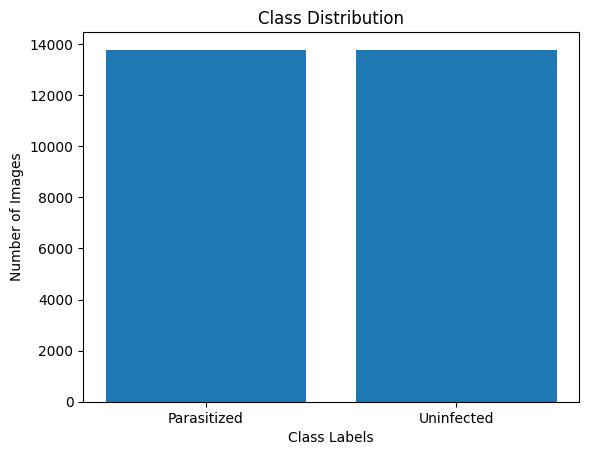

In [ ]:
# finding the no. of images in each class; mean width and height; min and max width and height
# this statistical data is stored in a list that contains 2 dictionaries with key and value

import os
import cv2    # computer vision

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the dataset directory
data_directory = '/content/data/cell_images'

# Function to load the dataset and extract image statistics
def get_image_stats(data_dir):
    class_labels = ['Parasitized', 'Uninfected']
    image_stats = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        num_images = len(os.listdir(class_dir))
        image_sizes = []

        for image_file in os.listdir(class_dir):
            if image_file.endswith(".png"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)    # cv2.IMREAD_GRAYSCALE indicates that the image should be loaded in grayscale mode
                height, width = image.shape
                image_sizes.append((height, width))

        image_sizes = np.array(image_sizes)
        mean_height, mean_width = np.mean(image_sizes, axis=0)
        min_height, min_width = np.min(image_sizes, axis=0)
        max_height, max_width = np.max(image_sizes, axis=0)

        image_stats.append({
            'Class': label,
            'Num_Images': num_images,
            'Mean_Height': mean_height,
            'Mean_Width': mean_width,
            'Min_Height': min_height,
            'Min_Width': min_width,
            'Max_Height': max_height,
            'Max_Width': max_width
        })
        print("image_stats: \n")
        print(image_stats)

    return image_stats

# Get data summary
data_summary = get_image_stats(data_directory)

# Convert data summary to a pandas DataFrame for easier visualization
data_summary_df = pd.DataFrame(data_summary)

# Display the data summary
print(data_summary_df)

# Plot bar chart for class distribution
# plt.figure(figsize=(8, 6))
plt.bar(data_summary_df['Class'], data_summary_df['Num_Images'])    # x axis; y axis
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
plt.show()

['C91P52ThinF_IMG_20150821_123314_cell_208.png', 'C78P39ThinF_IMG_20150606_104106_cell_174.png', 'C113P74ThinF_IMG_20150930_140646_cell_183.png', 'C99P60ThinF_IMG_20150918_141351_cell_139.png', 'C80P41ThinF_IMG_20150817_112329_cell_25.png', 'C68P29N_ThinF_IMG_20150819_134326_cell_144.png', 'C182P143NThinF_IMG_20151201_172257_cell_192.png', 'C82P43ThinF_IMG_20150817_123500_cell_231.png', 'C38P3thinF_original_IMG_20150621_112246_cell_236.png', 'C132P93ThinF_IMG_20151004_151941_cell_32.png', 'C59P20thinF_IMG_20150803_115303_cell_16.png', 'C68P29N_ThinF_IMG_20150819_134712_cell_4.png', 'C116P77ThinF_IMG_20150930_171558_cell_124.png', 'C116P77ThinF_IMG_20150930_171219_cell_95.png', 'C70P31_ThinF_IMG_20150819_142703_cell_2.png', 'C46P7ThinF_IMG_20151130_205828_cell_138.png', 'C184P145ThinF_IMG_20151203_104334_cell_51.png', 'C39P4thinF_original_IMG_20150622_105253_cell_97.png', 'C132P93ThinF_IMG_20151004_152808_cell_26.png', 'C95P56ThinF_IMG_20150821_171242_cell_101.png', 'C99P60ThinF_IMG_201

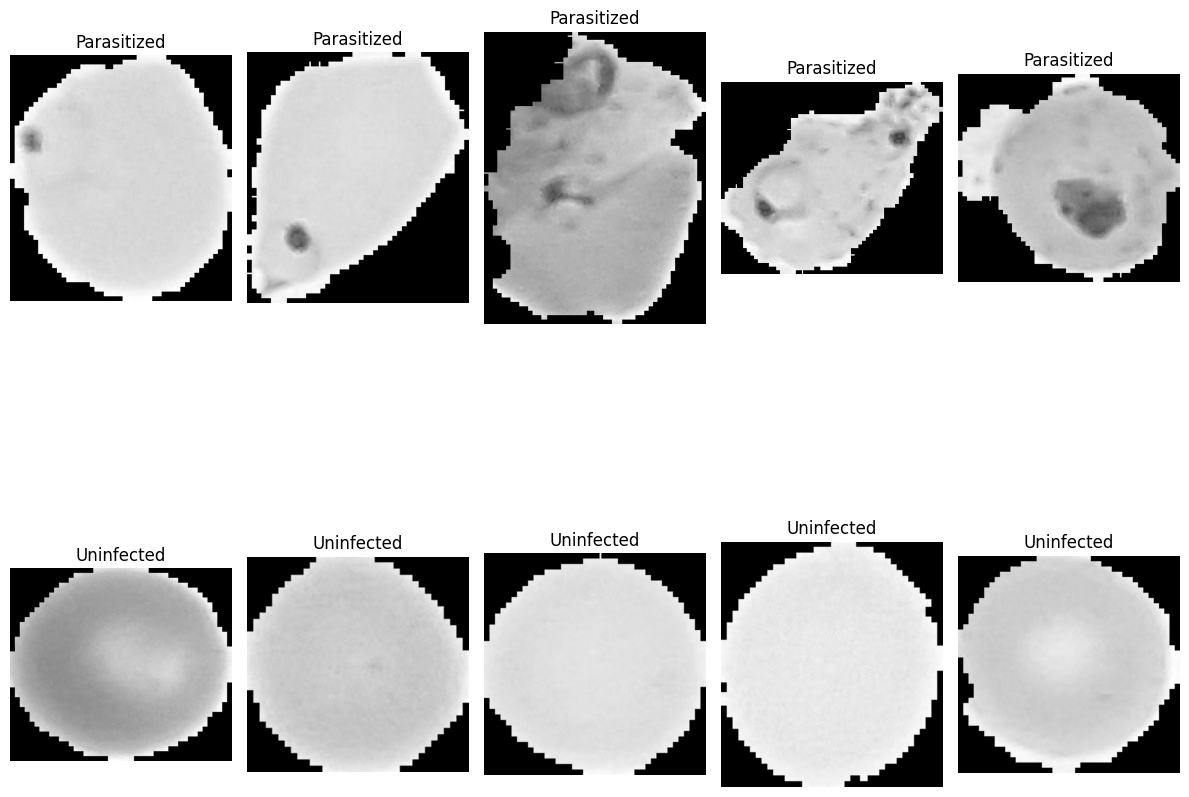

In [ ]:
# just view a sample of images


data_directory = '/content/data/cell_images'
def load_sample_images(data_dir, num_samples=5):
    class_labels = ['Parasitized', 'Uninfected']
    sample_images = []

    for label in class_labels:
        class_dir = os.path.join(data_dir, label)
        image_files = os.listdir(class_dir)
        print(image_files)
        sample_files = np.random.choice(image_files, num_samples, replace=False)    # np.random.choice allows you to randomly sample elements from an array
        # replace = false: once choosen, wont be choosen again!


        for image_file in sample_files:
            if image_file.endswith(".png"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

                sample_images.append((label, image))

    return sample_images

# Load sample cell images
num_samples_per_class = 5
sample_images = load_sample_images(data_directory, num_samples=num_samples_per_class)

# fig, axes = plt.subplots(len(sample_images) // num_samples_per_class, num_samples_per_class, figsize=(12, 12))
# for i, (label, image) in enumerate(sample_images):
#     row = i // num_samples_per_class
#     col = i % num_samples_per_class
#     axes[row, col].imshow(image, cmap='gray')
#     axes[row, col].axis('off')
#     axes[row, col].set_title(label)

# # Display the plot
# plt.tight_layout()
# plt.show()

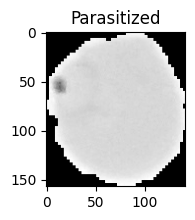

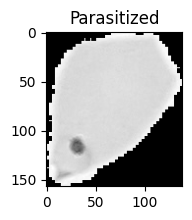

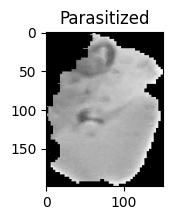

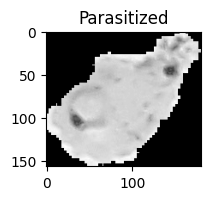

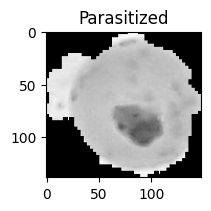

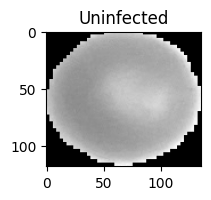

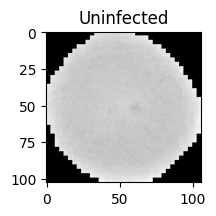

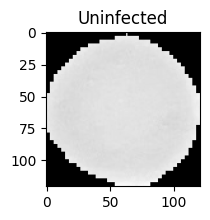

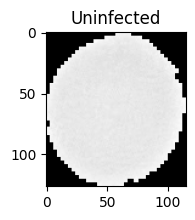

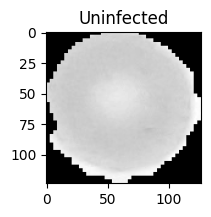

In [ ]:
import matplotlib.pyplot as plt

# Assuming sample_images is a list of tuples containing (label, image)
for label, image in sample_images:
    plt.figure(figsize=(2, 2))
    plt.imshow(image, cmap='gray')    # remember this: cmap..
    plt.title(label)
    plt.axis('off')   # else it will show unnecessary axis
    plt.show()


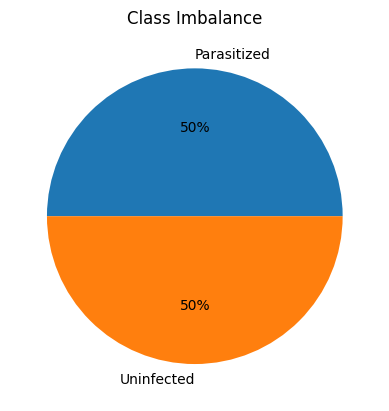

In [ ]:
# Calculate class distribution and visualize class imbalance
class_labels = ['Parasitized', 'Uninfected']
num_images_per_class = [len(os.listdir(os.path.join(data_directory, label,))) for label in class_labels]

print("")

# Visualize class imbalance (if any) with a pie chart
# plt.figure(figsize=(6, 6))
plt.pie(num_images_per_class, labels=class_labels, autopct='%d%%')
plt.title('Class Imbalance')
plt.show()

In [ ]:
# resizing


import os
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Data Preprocessing: Resizing
image_size = (128, 128)  # Choose the desired image size for resizing

def resize_images(data_dir, image_size):
    X, y = [], []
      class_labels = ['Parasitized', 'Uninfected']
      for i, label in enumerate(class_labels):
        class_dir = os.path.join(data_dir, label)
        for image_file in os.listdir(class_dir):
            if image_file.endswith(".png"):
                image_path = os.path.join(class_dir, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, image_size)   # note this
                X.append(image)
                y.append(i)

    X = np.array(X)
    y = np.array(y)
    return X, y

# Load and preprocess the data
data_directory='/content/data/cell_images'
X, y = resize_images(data_directory, image_size)

print(X, y)



# 0 Parasitized
# 1 Uninfected


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]] [0 0 0 ... 1 1 1]


In [ ]:
from tensorflow.keras.utils import to_categorical   # for one hot encoding
from sklearn.model_selection import train_test_split    # we have a function to split the dataset too!

# from tensorflow.keras.preprocessing.image import ImageDataGenerator   # keras: deep learning framework
# Data Augmentation
# data_augmentation = ImageDataGenerator(
#     rotation_range=10,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# X is the images
# y is the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 42 is the seed

# Normalize the pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


# Convert the class labels to one-hot encoded vectors
num_classes = len(np.unique(y))   # calculates no. of unique labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


# Check the data shapes after preprocessing and augmentation
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22046, 128, 128)
y_train shape: (22046, 2)
X_test shape: (5512, 128, 128)
y_test shape: (5512, 2)


In [ ]:
X.shape, y.shape

((27558, 128, 128), (27558,))

In [ ]:
X_train.shape, y_train.shape

((22046, 128, 128), (22046, 2))

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[    0     1     2 ... 22043 22044 22045]
[    0     1     2 ... 22043 22044 22045]
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ..

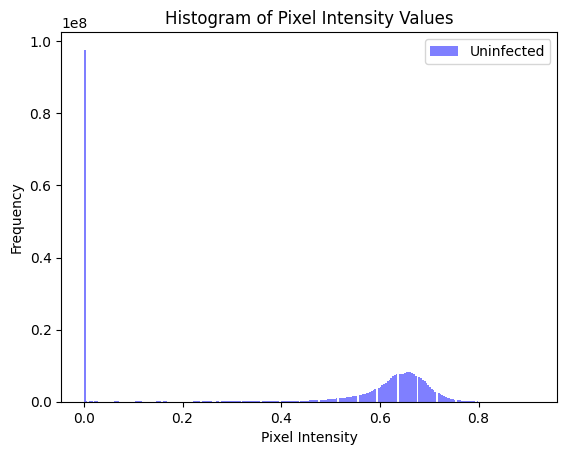

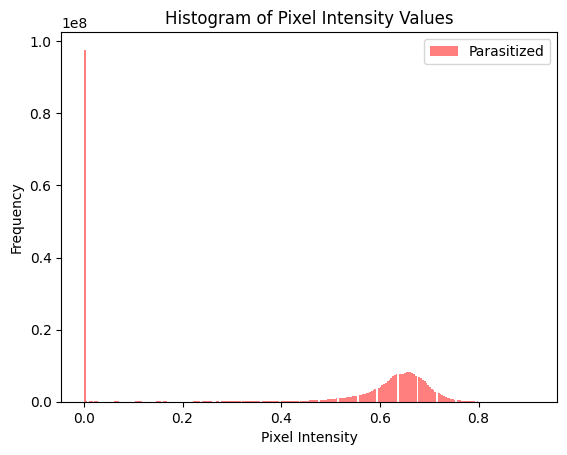

In [ ]:
# visualization of pixel intensity values

# y_train = np.squeeze(y_train)
# y_train = y_train.astype(int)

print(y_train)
print(X)


parasitized_indices = np.where(y_train == 0)[0]
uninfected_indices = np.where(y_train == 1)[0]

print(parasitized_indices)
print(uninfected_indices)

parasitized_images = X_train[parasitized_indices]
uninfected_images = X_train[uninfected_indices]

print(parasitized_images)
print(uninfected_images)

# Plot histograms of pixel intensity values
# plt.figure(figsize=(10, 6))
plt.hist(uninfected_images.flatten(), bins=256, alpha=0.5, label='Uninfected', color='blue')
# flatten converts 2d array to 1d array
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.legend()
plt.show()
plt.hist(parasitized_images.flatten(), bins=256, alpha=0.5, label='Parasitized', color='red')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.legend()
plt.show()

In [ ]:
# Alternatively, you can plot kernel density estimates (KDE)
plt.figure(figsize=(10, 6))
plt.hist(parasitized_images.flatten(), bins=256, density=True, alpha=0.5, label='Parasitized', color='red')
plt.hist(uninfected_images.flatten(), bins=256, density=True, alpha=0.5, label='Uninfected', color='blue')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.title('Kernel Density Estimate of Pixel Intensity Values')
plt.legend()
plt.show()